<a href="https://colab.research.google.com/github/sarahwierzbicki/projects/blob/main/Gym_Attendance_EDA_for_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
from patsy import dmatrices, dmatrix
%matplotlib inline

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

load dataset

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(5)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


notes on data set:
date - str; datetime of data
timestamp - int; number of seconds since beginning of day
day of week - int; 0(monday) - 6(sunday)
is _weekend - bool; 1 = Yes and 0 = No
is_holiday - bool; 1 = yes and 0 = no
temperature - float; degrees F
is_start_of_semester - bool; 1 = yes and 0 = no
month- int; 1(jan) to 12(dec)
hour - int; 0(12 am) - 23 (11 pm)


data pre-processing

In [ ]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [ ]:
df.dtypes

,0
number_people,int64
date,object
timestamp,int64
day_of_week,int64
is_weekend,int64
is_holiday,int64
temperature,float64
is_start_of_semester,int64
is_during_semester,int64
month,int64


In [ ]:
#sort by number of attendees decr
df.sort_values('number_people')

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
31091,0,2016-06-13 03:30:55-07:00,12655,0,0,0,55.66,0,0,6,3
44384,0,2016-09-17 04:02:08-07:00,14528,5,1,0,55.39,0,1,9,4
44383,0,2016-09-17 03:52:08-07:00,13928,5,1,0,55.33,0,1,9,3
44382,0,2016-09-17 03:42:07-07:00,13327,5,1,0,55.33,0,1,9,3
44381,0,2016-09-17 03:32:06-07:00,12726,5,1,0,55.33,0,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...
15489,125,2016-01-20 16:50:18-08:00,60618,2,0,0,56.50,1,1,1,16
929,134,2015-08-24 12:40:17-07:00,45617,0,0,0,65.66,0,0,8,12
15508,138,2016-01-20 20:40:15-08:00,74415,2,0,0,53.51,1,1,1,20
930,139,2015-08-24 12:50:19-07:00,46219,0,0,0,65.66,0,0,8,12


Text(0.5, 1.0, 'Number of People in Gym by Hour')

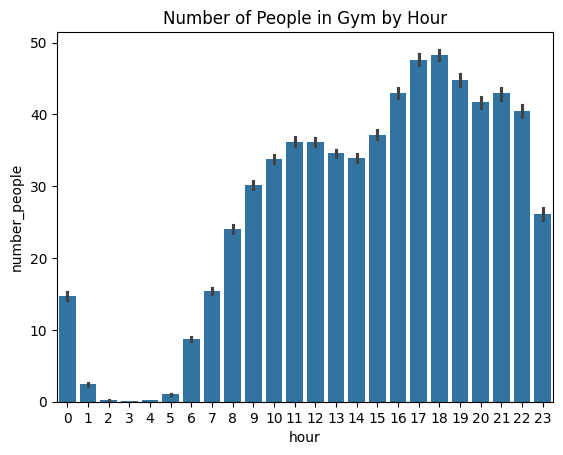

In [ ]:
bar = sns.barplot(x='hour', y='number_people', data=df)
bar.set_title('Number of People in Gym by Hour')

In [ ]:
# add column to represent AM  and PM
df['timeframe'] = df['hour'].apply(lambda x: 0 if x <= 12 else 1)
#0 will be am and 1 will be pm
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,timeframe
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,1
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,1
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,1
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,1
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18,1
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18,1
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19,1
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19,1


In [ ]:
df['number_people'].max()

145

In [ ]:

df['number_people'].median()
#crowded will consist of number_people > 50

28.0

In [ ]:
#add column to see if the gym is crowded
df.loc[df['number_people'] >= 50, 'crowded'] = 'crowded'
df.loc[df['number_people'] < 50, 'crowded'] = 'not crowded'
print(df)

       number_people                       date  timestamp  day_of_week  \
0                 37  2015-08-14 17:00:11-07:00      61211            4   
1                 45  2015-08-14 17:20:14-07:00      62414            4   
2                 40  2015-08-14 17:30:15-07:00      63015            4   
3                 44  2015-08-14 17:40:16-07:00      63616            4   
4                 45  2015-08-14 17:50:17-07:00      64217            4   
...              ...                        ...        ...          ...   
62179             23  2017-03-18 18:42:28-07:00      67348            5   
62180             21  2017-03-18 18:52:35-07:00      67955            5   
62181             25  2017-03-18 19:02:40-07:00      68560            5   
62182             18  2017-03-18 19:12:47-07:00      69167            5   
62183             23  2017-03-18 19:22:51-07:00      69771            5   

       is_weekend  is_holiday  temperature  is_start_of_semester  \
0               0           0  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
 11  timeframe             62184 non-null  int64  
 12  crowded               62184 non-null  object 
dtypes: float64(1), int64(10), object(2)
memory usage: 6.2+ MB


In [ ]:

#we only want to work with integers so we'll convert the temperature float into an int
#drop the date column and is holiday column(no instances of 1)
df['temperature'] = df['temperature'].astype(int)
df.drop('date', axis = 1, inplace=True)
df.drop('is_holiday', axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   number_people         62184 non-null  int64 
 1   timestamp             62184 non-null  int64 
 2   day_of_week           62184 non-null  int64 
 3   is_weekend            62184 non-null  int64 
 4   temperature           62184 non-null  int64 
 5   is_start_of_semester  62184 non-null  int64 
 6   is_during_semester    62184 non-null  int64 
 7   month                 62184 non-null  int64 
 8   hour                  62184 non-null  int64 
 9   timeframe             62184 non-null  int64 
 10  crowded               62184 non-null  object
dtypes: int64(10), object(1)
memory usage: 5.2+ MB


Text(0.5, 1.0, 'Density by Hour')

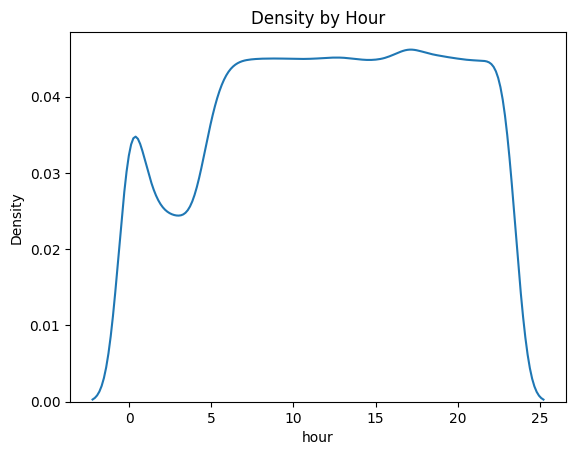

In [ ]:

kde = sns.kdeplot(df['hour'])
kde.set_title('Density by Hour')

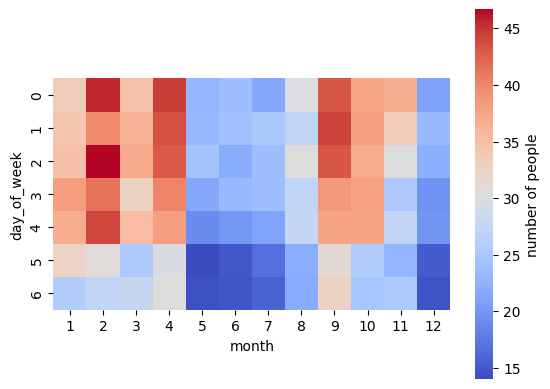

In [ ]:
#heatmap of numer_people, day_of_week, and hour
crowd_df = df[['day_of_week', 'hour', 'number_people','month']].copy()
corr = crowd_df.corr()
crowd_pt = crowd_df.pivot_table(index='day_of_week', columns='month', values='number_people').round(2)
crowd_heat = sns.heatmap(crowd_pt, cmap='coolwarm', square= True, yticklabels=1, xticklabels=1, cbar_kws={'label': 'number of people'})




we now know there is correlation between hour, day of the week, and the number of people there

attendance and temperature


Text(0, 0.5, 'Number of People')

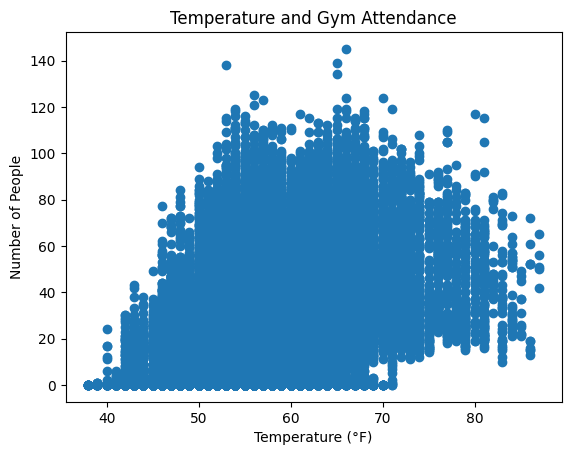

In [ ]:
x = df['temperature']
y = df['number_people']
plt.scatter(x,y)
plt.title('Temperature and Gym Attendance')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of People')